In [128]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [129]:
golf_scores = pd.read_csv('jake_golf_scores.csv')

In [130]:
golf_scores.head()

,DateOfRound,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,6/25/2020,76,36,21,18,85.714286,7,13,43,5,0,0.000000
1,6/26/2020,72,31,19,17,89.473684,11,12,41,6,3,50.000000
2,6/29/2020,70,30,20,16,80.000000,6,11,41,7,3,42.857143
3,6/30/2020,72,33,21,17,80.952381,6,13,43,5,2,40.000000
4,7/1/2020,72,32,17,16,94.117647,6,10,42,8,3,37.500000


In [131]:
golf_scores_num = golf_scores.drop(columns = 'DateOfRound')

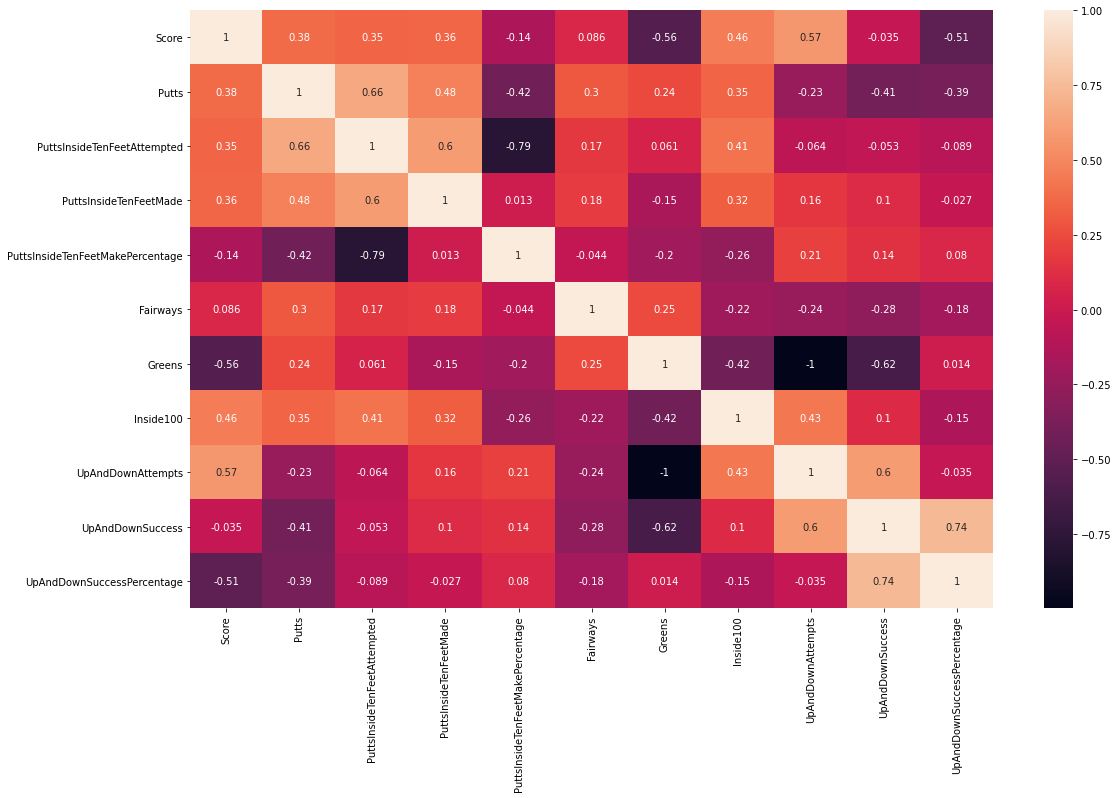

In [132]:
golf_scores_num_correlations = golf_scores_num.corr()
plt.figure(figsize = (18,11))
sns.heatmap(golf_scores_num_correlations, annot = True);

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [134]:
base_features = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_num[base_features]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [135]:
y = golf_scores_num.Score 
y.head()

0    76
1    72
2    70
3    72
4    72
Name: Score, dtype: int64

In [136]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [137]:
print(X.shape, y.shape)

(37, 10) (37,)


In [138]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

[ 0. 20.  0. 40. 20.  0. 25. 25.]

CV Mean: 16.25%


In [139]:
# Difference between training and test set for Logistic Regression model 
from sklearn.metrics import accuracy_score
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 89.66%
Test Accuracy: 12.50%



In [140]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 0. 40.  0.  0.  0. 25. 25. 25.]

CV Mean: 14.37%


In [141]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [142]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[60.  0.  0. 20. 20. 50.  0. 50.]

CV Mean: 25.00%


In [143]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 41.38%
Test Accuracy: 12.50%



In [144]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[20. 20.  0. 40. 20. 25. 50. 25.]

CV Mean: 25.00%


In [145]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [146]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[20. 20. 20. 20. 20. 25. 25. 25.]

CV Mean: 21.88%


In [147]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 24.14%
Test Accuracy: 12.50%



In [148]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, X, y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[16:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [149]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[16:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 25.00%



In [150]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, X, y, cv = 8, scoring = 'neg_mean_squared_error')
print(-1 * cv)
print()
print('CV Mean:' + str((-1 * cv.mean())))

[ 4.54556263  3.44895682  7.38162946  2.56369112  3.51418557  7.11501693
 12.49790221  6.54098772]

CV Mean:5.95099155686836


In [151]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

[16:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [152]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

[16:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [153]:
# Compare all results in data frame
results_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
results_on_val_X = pd.DataFrame(results_on_val_X)
results_on_val_X = results_on_val_X.rename(columns = {0: 'Test Accuracy on Score'})
results_on_val_X['Test Accuracy on Score'] = 100 * results_on_val_X['Test Accuracy on Score']
results_on_val_X = results_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
results_on_val_X['CV Accuracy on Score'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
results_on_val_X['CV Accuracy on Score'] = 100 * results_on_val_X['CV Accuracy on Score']
results_on_val_X

,Test Accuracy on Score,CV Accuracy on Score
Logistic Regression,12.5,16.250
Decision Tree,37.5,14.375
Random Forest,37.5,25.000
KNN,12.5,25.000
XGB Classifier,25.0,22.500
SVC,12.5,21.875
Voting Classifier,37.5,19.375


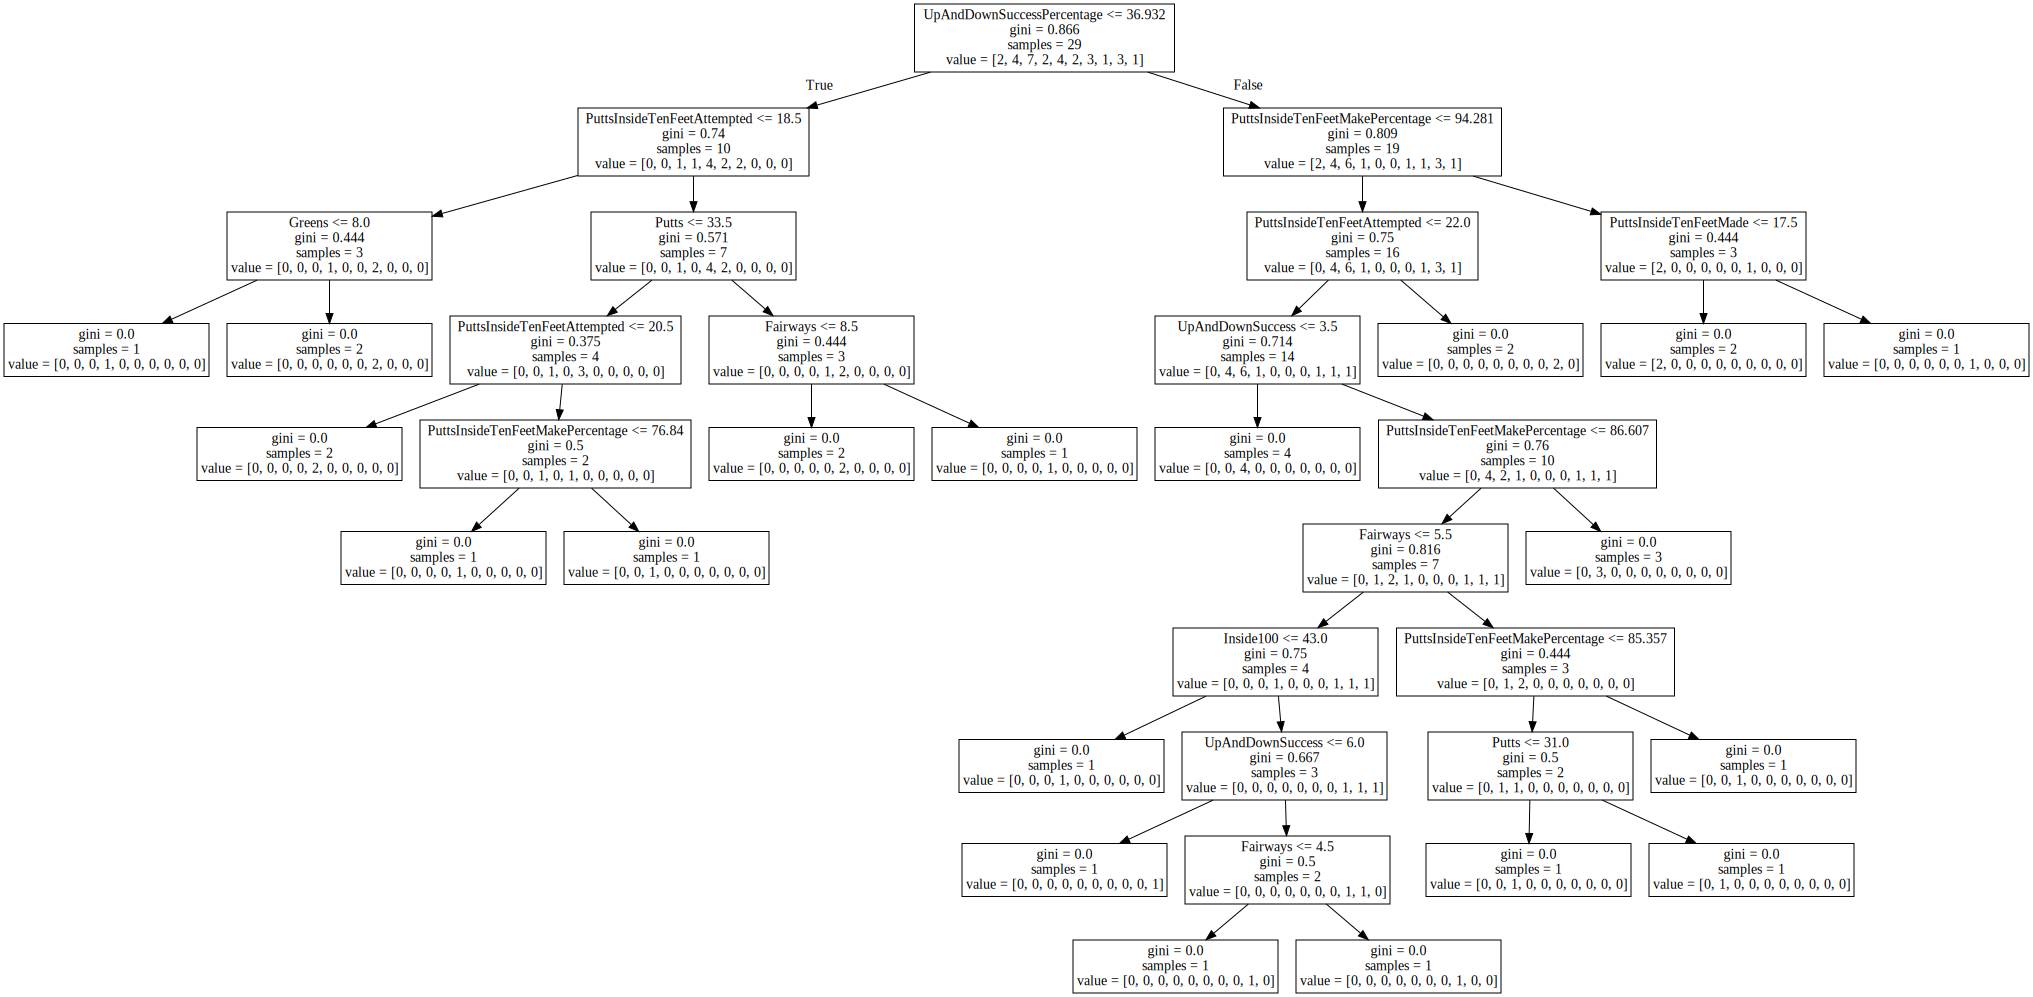

In [154]:
import graphviz

tree_graph = tree.export_graphviz(dt, out_file=None, feature_names= base_features)
graphviz.Source(tree_graph)

In [155]:
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0500 ± 0.1225,Greens
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Inside100
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,Putts
-0.0250 ± 0.1000,PuttsInsideTenFeetAttempted
-0.0500 ± 0.1225,UpAndDownSuccessPercentage
-0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage


In [156]:
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.1000 ± 0.2449,UpAndDownSuccessPercentage
0.0750 ± 0.1225,UpAndDownSuccess
0.0750 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0750 ± 0.1225,PuttsInsideTenFeetMade
0.0750 ± 0.1225,PuttsInsideTenFeetAttempted
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,Putts


In [157]:
knn.fit(train_X, train_y)
perm3 = PermutationImportance(knn, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm3, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1225,UpAndDownSuccessPercentage
0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,PuttsInsideTenFeetAttempted
0 ± 0.0000,Putts


In [159]:
# Fit all data
knn.fit(train_X, train_y)
reg.fit(train_X, train_y)
lr.fit(train_X, train_y)
rf.fit(train_X, train_y)
# Predict what y will be and add to data frame 
PredictedScore_Knn = knn.predict(val_X)
PredictedScore_Knn = pd.DataFrame(PredictedScore_Knn)
PredictedScore_Knn = PredictedScore_Knn.rename(columns = {0 : 'Knn PredictedScore'})
PredictedScore_reg = reg.predict(val_X)
PredictedScore_reg = pd.DataFrame(PredictedScore_reg)
PredictedScore_reg = PredictedScore_reg.rename(columns = {0 : 'Linear Regression PredictedScore'})
PredictedScore_lr = lr.predict(val_X)
PredictedScore_lr = pd.DataFrame(PredictedScore_lr)
PredictedScore_lr = PredictedScore_lr.rename(columns = {0 : 'Logistic Regression PredictedScore'})
PredictedScore_rf = rf.predict(val_X)
PredictedScore_rf = pd.DataFrame(PredictedScore_rf)
PredictedScore_rf = PredictedScore_rf.rename(columns = {0 : 'Random Forest PredictedScore'})
# Concat all predicted scores to data frame 
PredictedScore = [PredictedScore_Knn, PredictedScore_lr, PredictedScore_reg, PredictedScore_rf]
PredictedScore = pd.concat(PredictedScore, axis = 1)
# Concat predicted scores with data used to predict it 
Predict_X = pd.DataFrame(val_X)
Predict_X = Predict_X.reset_index(drop = True)
Predicition = [Predict_X, PredictedScore]
PredictedScoreWithStats = pd.concat(Predicition, axis = 1)
# Concat predicted scores with actual scorres to compare
Actual_Score = pd.DataFrame(val_y)
Actual_Score = Actual_Score.reset_index(drop = True)
Actual_Score = Actual_Score.rename(columns = {0: 'Actual Score'})
Prediction_With_Actual = [PredictedScoreWithStats, Actual_Score]
Prediction_With_Actual = pd.concat(Prediction_With_Actual, axis = 1)
# Move to csv file 
#Prediction_With_Actual.to_csv('Prediction_With_Actual_All_Models.csv')


1. feature 9 (0.144530)
2. feature 0 (0.117418)
3. feature 1 (0.112701)
4. feature 6 (0.109771)
5. feature 8 (0.099364)
6. feature 4 (0.091688)
7. feature 3 (0.090218)
8. feature 5 (0.082424)
9. feature 7 (0.080579)
10. feature 2 (0.071307)


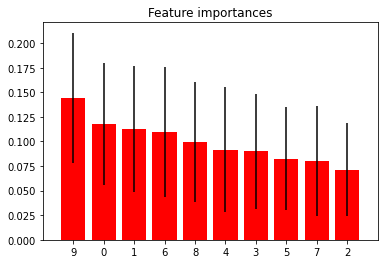

In [160]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [161]:
base_features = pd.DataFrame(base_features)
base_features

,0
0,Putts
1,PuttsInsideTenFeetAttempted
2,PuttsInsideTenFeetMade
3,PuttsInsideTenFeetMakePercentage
4,Fairways
5,Greens
6,Inside100
7,UpAndDownAttempts
8,UpAndDownSuccess
9,UpAndDownSuccessPercentage


In [162]:
# Defining percentage functions 
def putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade):
    ten_feet_percentage = (100 * (PuttsInsideTenFeetMade / PuttsInsideTenFeetAttempted))
    return ten_feet_percentage

def up_and_down(UpAndDownAttempts, UpAndDownSuccess):
    up_and_down_percentage = (100 * (UpAndDownSuccess / UpAndDownAttempts))
    return up_and_down_percentage

In [163]:
# Input of round
Putts = 25
PuttsInsideTenFeetAttempted = 16
PuttsInsideTenFeetMade = 16
Fairways = 12
Greens = 17
Inside100 = 35
UpAndDownAttempts = 1
UpAndDownSuccess = 1
PuttsInsideTenFeetMakePercentage = putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade)
UpAndDownSuccessPercentage = up_and_down(UpAndDownAttempts, UpAndDownSuccess)


In [164]:
golf_round = np.array([Putts, PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade, Fairways, Greens, Inside100, UpAndDownAttempts, UpAndDownSuccess, PuttsInsideTenFeetMakePercentage, UpAndDownSuccessPercentage]).reshape(1,-1)
prediction = rf.predict(golf_round)
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns = {0: 'Predicted Score'})
prediction

,Predicted Score
0,71


In [165]:
# Create new data frame for comparison to average
golf_scores_with_average = golf_scores.copy()
golf_scores_with_average['AverageScore'] = golf_scores_with_average.Score.mean()
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average.Score > golf_scores_with_average.AverageScore

In [166]:
# Above or below average column changed to when above average = 1 and below average = 0
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average['AboveOrBelowAverage'].astype(int)
golf_scores_with_average_num = golf_scores_with_average.drop(columns = ['DateOfRound'])
golf_scores_with_average_num

,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage,AverageScore,AboveOrBelowAverage
0,76,36,21,18,85.714286,7,13,43,5,0,0.000000,74.378378,1
1,72,31,19,17,89.473684,11,12,41,6,3,50.000000,74.378378,0
2,70,30,20,16,80.000000,6,11,41,7,3,42.857143,74.378378,0
3,72,33,21,17,80.952381,6,13,43,5,2,40.000000,74.378378,0
4,72,32,17,16,94.117647,6,10,42,8,3,37.500000,74.378378,0
5,72,31,21,16,76.190476,6,12,45,6,3,50.000000,74.378378,0
6,73,31,20,17,85.000000,4,10,41,8,5,62.500000,74.378378,0
7,73,30,16,15,93.750000,5,7,44,11,4,36.363636,74.378378,0
8,75,34,20,18,90.000000,10,11,44,7,2,28.571429,74.378378,1
9,72,33,21,17,80.952381,7,12,43,6,2,33.333333,74.378378,0


In [191]:
base_features2 = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_with_average_num[base_features2]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [168]:
y = golf_scores_with_average_num.AboveOrBelowAverage
y.head()

0    1
1    0
2    0
3    0
4    0
Name: AboveOrBelowAverage, dtype: int32

In [169]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [170]:
print(X.shape, y.shape)

(37, 10) (37,)


In [171]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

[100.  60.  60.  40. 100. 100.  75. 100.]

CV Mean: 79.38%


In [172]:
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 86.21%
Test Accuracy: 87.50%



In [173]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 40.  20.  60.  60.  60.  50.  50. 100.]

CV Mean: 55.00%


In [174]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 62.50%



In [175]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[100.   0.  80.  80.  80. 100.  50. 100.]

CV Mean: 73.75%


In [176]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 79.31%
Test Accuracy: 62.50%



In [177]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[ 80.  20.  80.  40. 100.  25.  25. 100.]

CV Mean: 58.75%


In [178]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 75.00%



In [179]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[ 80.   0.  80.  80.  80.  75.  75. 100.]

CV Mean: 71.25%


In [180]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 75.86%
Test Accuracy: 62.50%



In [181]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, X, y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[16:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [182]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[16:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 62.50%



In [183]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

[16:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [184]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

[16:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 96.55%
Test Accuracy: 75.00%



In [185]:
# Compare all results in data frame
below_or_above_average_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
below_or_above_average_on_val_X = pd.DataFrame(below_or_above_average_on_val_X)
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(columns = {0: 'Test Accuracy for Average'})
below_or_above_average_on_val_X['Test Accuracy for Average'] = 100 * below_or_above_average_on_val_X['Test Accuracy for Average']
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
below_or_above_average_on_val_X['CV Accuracy for Average'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
below_or_above_average_on_val_X['CV Accuracy for Average'] = 100 * below_or_above_average_on_val_X['CV Accuracy for Average']
comparison = [results_on_val_X, below_or_above_average_on_val_X]
comparison = pd.concat(comparison, axis = 1)
comparison

,Test Accuracy on Score,CV Accuracy on Score,Test Accuracy for Average,CV Accuracy for Average
Logistic Regression,12.5,16.250,87.5,79.375
Decision Tree,37.5,14.375,62.5,55.000
Random Forest,37.5,25.000,75.0,58.750
KNN,12.5,25.000,62.5,73.750
XGB Classifier,25.0,22.500,62.5,67.500
SVC,12.5,21.875,62.5,71.250
Voting Classifier,37.5,19.375,75.0,73.125


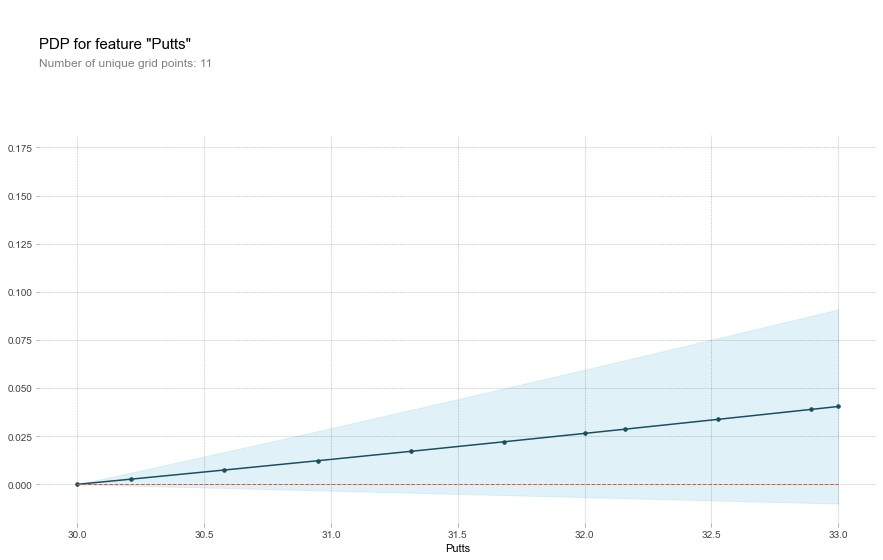

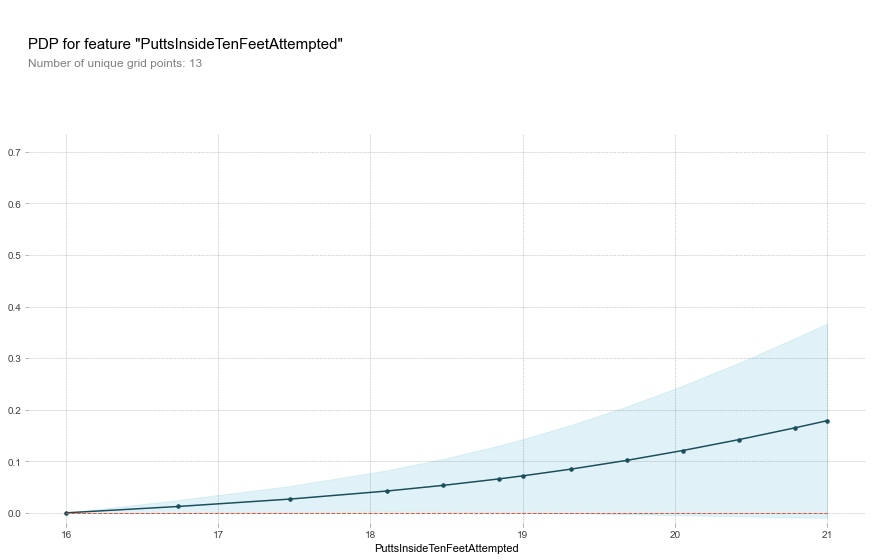

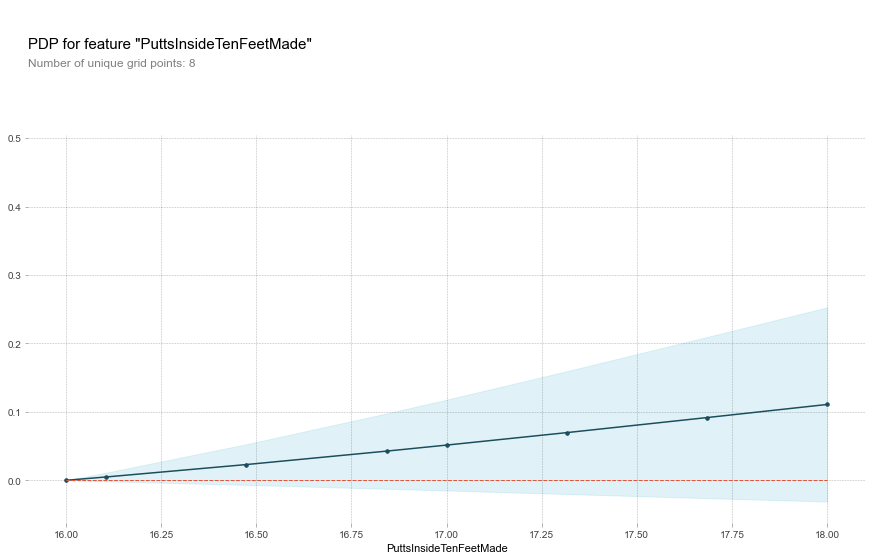

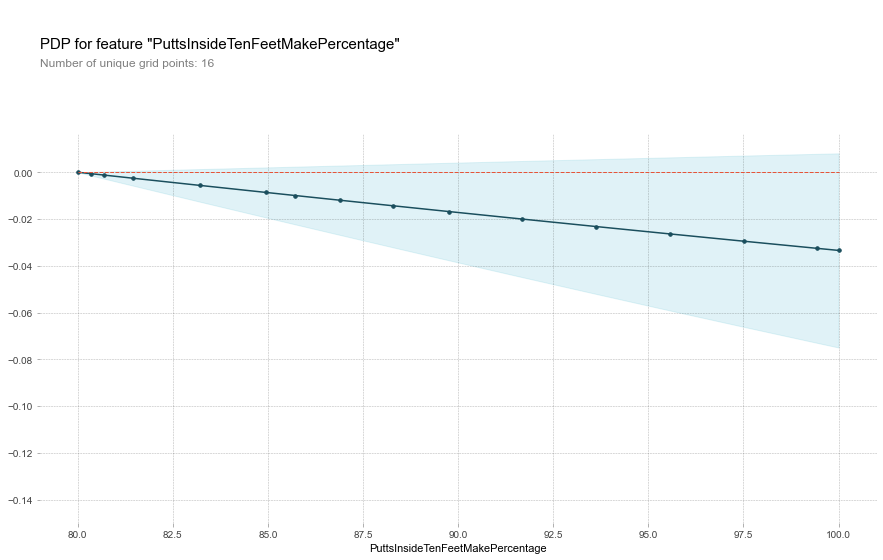

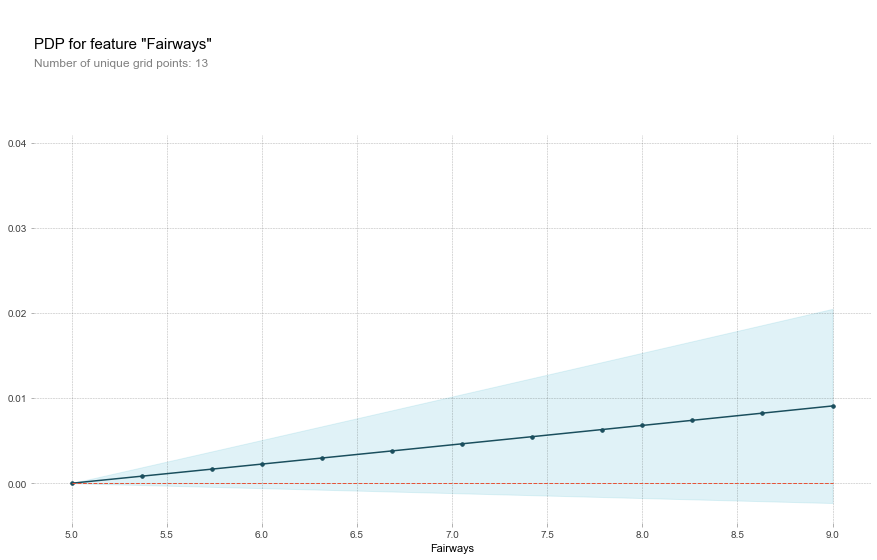

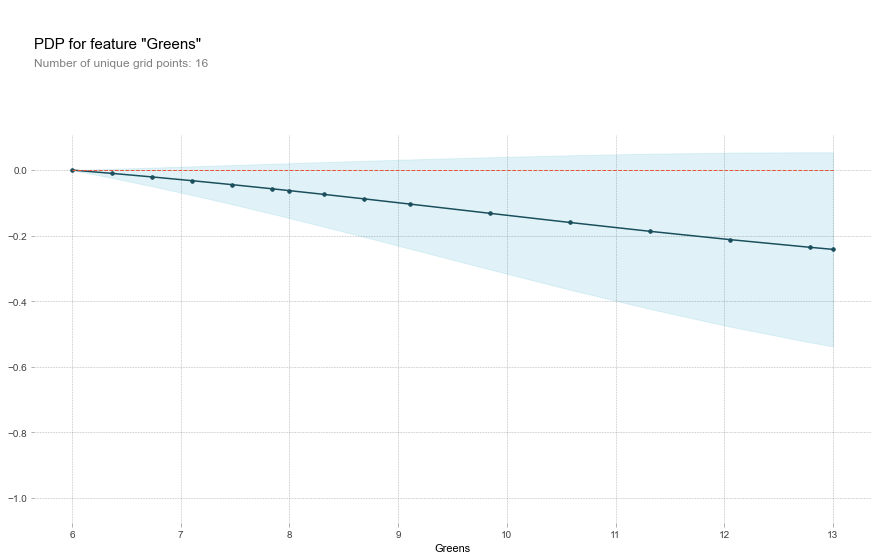

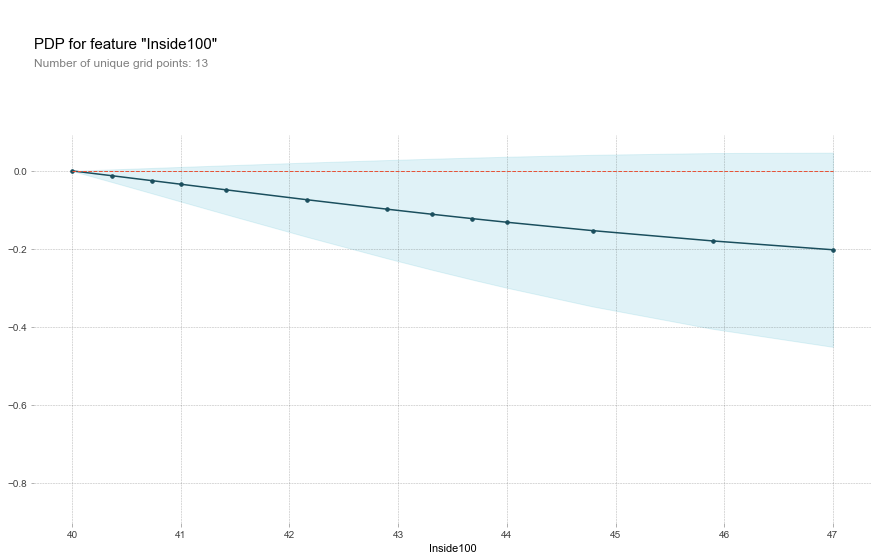

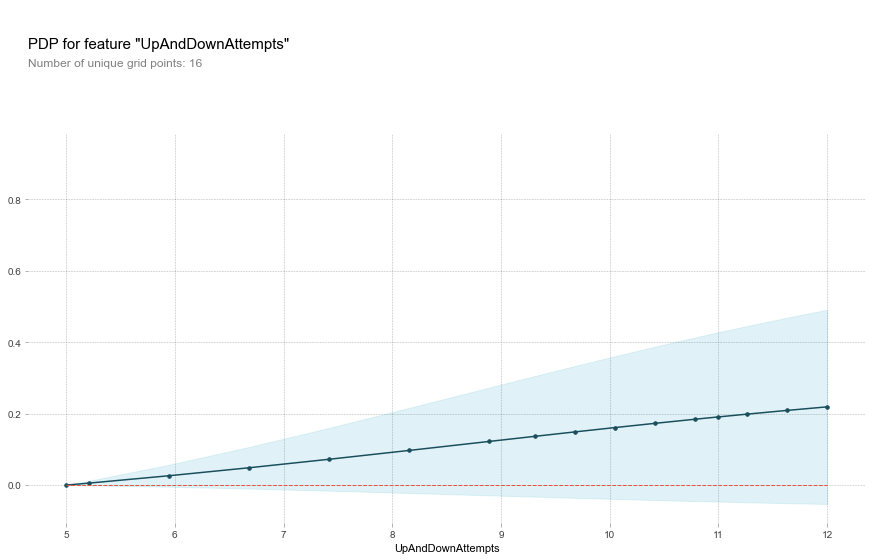

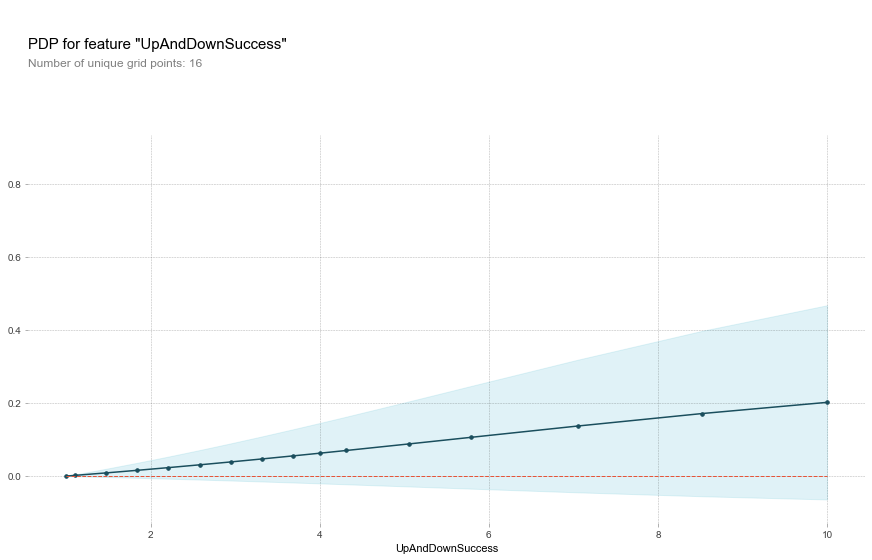

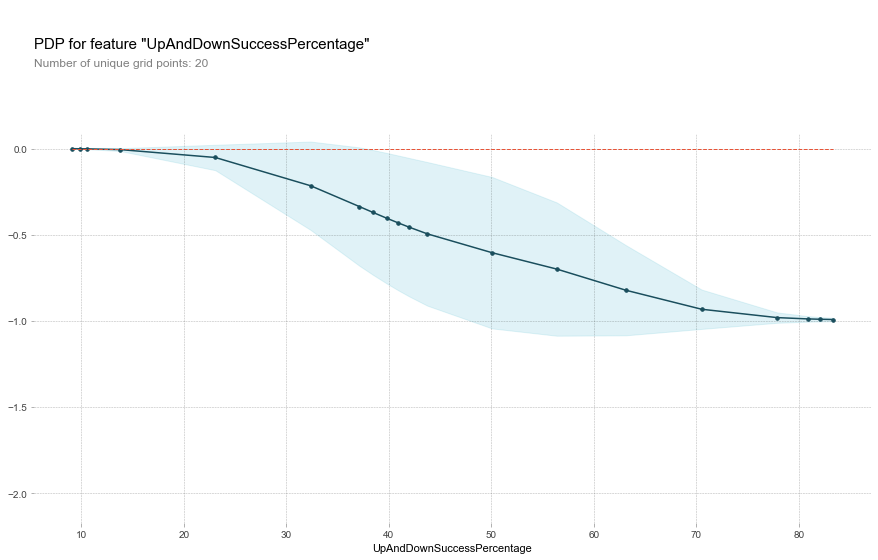

In [194]:
# 1 is above average, -1 is below average
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features2:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features2, feature = feat_name, num_grid_points = 20)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [211]:
# For Logistic Regression model 
data_for_prediction = val_X.iloc[0:]  # use 1 row of data here. Could use multiple rows if desired
percent_chances = lr.predict_proba(data_for_prediction)
percent_chances = pd.DataFrame(percent_chances)
percent_chances = percent_chances.rename(columns = {0 :'% chance of Below Average', 1: '% chance of Above Average'})
val_y = val_y.reset_index().drop(columns = ['index'])
val_X = val_X.reset_index().drop(columns = ['index'])
percent_chances = pd.concat([val_X, percent_chances, val_y], axis = 1)
percent_chances['AboveOrBelowAverage'] = percent_chances['AboveOrBelowAverage'].apply(lambda x: 'Below' if x == 0 else 'Above')
percent_chances

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage,% chance of Below Average,% chance of Above Average,AboveOrBelowAverage
0,30,20,16,80.000000,6,11,41,7,3,42.857143,0.637891,0.362109,Below
1,30,16,16,100.000000,6,9,41,9,1,11.111111,0.010619,0.989381,Above
2,33,21,17,80.952381,6,13,43,5,2,40.000000,0.704217,0.295783,Below
3,32,21,18,85.714286,5,8,44,10,6,60.000000,0.552618,0.447382,Above
4,31,19,17,89.473684,8,13,44,5,4,80.000000,0.999985,0.000015,Below
5,33,19,18,94.736842,7,8,47,11,1,9.090909,0.000522,0.999478,Above
6,30,18,18,100.000000,8,6,40,12,10,83.333333,0.970228,0.029772,Below
7,32,21,18,85.714286,9,7,44,11,4,36.363636,0.004923,0.995077,Above
